In [4]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [5]:
train_data=data[:1000]
train_target=target[:1000]

test_data=data[1000:]
test_target=target[1000:]

In [17]:
print(train_data.shape)
print(train_target.shape)

print(test_data.shape)
print(test_target.shape)

(1000, 50, 1)
(1000, 1)
(209, 50, 1)
(209, 1)


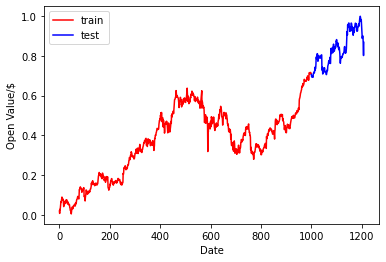

In [18]:
from matplotlib import pyplot as plt

test_x_range=np.arange(1000,1209,1)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.show()

In [10]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout

model=Sequential()

model.add(LSTM(units=96,return_sequences=True,input_shape=(data.shape[1:])))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='linear'))

model.compile(loss='mse',optimizer='adam')

In [11]:
history=model.fit(train_data,train_target,epochs=200,validation_split=0.1)

Epoch 1/20
29/29 [==============================] - 26s 337ms/step - loss: 0.0465 - val_loss: 0.0197
Epoch 2/20
29/29 [==============================] - 8s 262ms/step - loss: 0.0048 - val_loss: 0.0015
Epoch 3/20
29/29 [==============================] - 10s 330ms/step - loss: 0.0025 - val_loss: 0.0033
Epoch 4/20
29/29 [==============================] - 9s 314ms/step - loss: 0.0025 - val_loss: 0.0027
Epoch 5/20
29/29 [==============================] - 9s 312ms/step - loss: 0.0023 - val_loss: 0.0031
Epoch 6/20
29/29 [==============================] - 10s 331ms/step - loss: 0.0020 - val_loss: 0.0060
Epoch 7/20
29/29 [==============================] - 10s 329ms/step - loss: 0.0023 - val_loss: 0.0032
Epoch 8/20
29/29 [==============================] - 9s 316ms/step - loss: 0.0019 - val_loss: 0.0047
Epoch 9/20
29/29 [==============================] - 6s 213ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 10/20
29/29 [==============================] - 10s 328ms/step - loss: 0.0032 - val_loss: 7

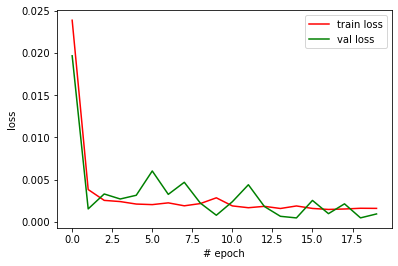

In [12]:
plt.plot(history.history['loss'],'r',label='train loss')
plt.plot(history.history['val_loss'],'g',label='val loss')
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [13]:
result=model.predict(test_data)

from sklearn.metrics import r2_score

r2=r2_score(test_target,result)
print('r2 score:',r2)

r2 score: 0.5996982798212658


In [19]:
print(result.shape)

(209, 1)


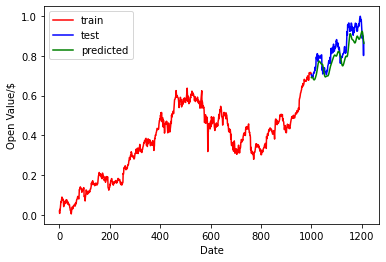

In [14]:
test_x_range=np.arange(1000,1209,1)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.plot(test_x_range,result,'g',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()

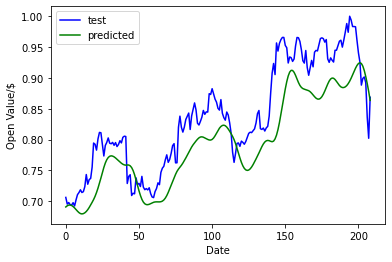

In [15]:
plt.plot(test_target,'b',label='test')
plt.plot(result,'g',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()

In [16]:
test_x_range.shape

(209,)